In [1]:
#### My own task. CE888 Decision Making Lab 3
### This notebook is created following the Lab Slides.


In [9]:
# Loading Data set 
#train = pd.read_csv('/Users/juanpabloequihualinares/Desktop/MSc Data Science/Machine Learning and Data 18_Data.csv')
import pandas as pd
import numpy as np

bank=pd.read_csv('bank-additional-full.csv',sep=";")

In [70]:
bank_dummies=pd.get_dummies(bank)

columns=bank_dummies.columns

features=columns[:-2]
target=["y_yes"]

bank_train=bank_dummies[features]
bank_target=bank_dummies[target]

drop_cols=['duration']
bank_train=bank_train.drop(drop_cols, axis=1)

4640


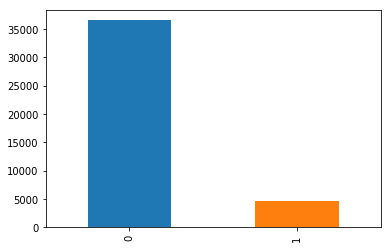

In [76]:
## Targer Histogram
bank_target['y_yes'].value_counts().plot(kind='bar')
print(sum(bank_target['y_yes']))


In [77]:
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier(n_estimators=100,min_samples_split= 40,
                            max_depth= 4, min_samples_leaf= 30)      
extc.fit(bank_train,bank_target)          

/Users/juanpabloequihualinares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=4, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=30, min_samples_split=40,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
## Cross Validation 

from sklearn.model_selection import cross_val_score
print("----Accuracy:")
scores_extc = cross_val_score(estimator=extc, X=bank_train, y=bank_target, cv=10, n_jobs=4,scoring='accuracy')
print(scores_extc)
print(scores_extc.mean())

----Accuracy:
[ 0.8873513   0.8873513   0.8873513   0.8873513   0.8873513   0.88759408
  0.8873513   0.62539451  0.88805245  0.5621661 ]
0.828731493531


In [98]:

from sklearn.metrics import classification_report, confusion_matrix  
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
        #print t
#         plt.text(j, i, t,
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



[[36257   291]
 [ 3861   779]]
-------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.95     36548
           1       0.73      0.17      0.27      4640

   micro avg       0.90      0.90      0.90     41188
   macro avg       0.82      0.58      0.61     41188
weighted avg       0.88      0.90      0.87     41188

-------------
Normalized confusion matrix


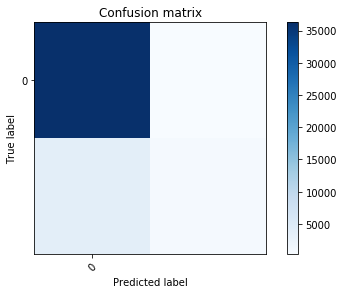

In [99]:
# Confusion Matrix

extc_y_pred = extc.predict(bank_train)
extc_cnf_matrix = confusion_matrix(bank_target, extc_y_pred)
np.set_printoptions(precision=2)

print(confusion_matrix(bank_target,extc_y_pred))  

print("-------------")

print(classification_report(bank_target,extc_y_pred)) 
print("-------------")

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(extc_cnf_matrix, classes=range(len(set(bank_target))), normalize = True,
                      title='Confusion matrix')

#plt.savefig("confusion.png",bbox_inches='tight')
#plt.savefig("confusion.pdf",bbox_inches='tight')